# 1. Geometry test

# 2. Digitizer

```bash

./simulation -m ../tests/mathusla40/run_parma_mathusla40.mac
./digitizer data/run_0.root -p 100

```

In [16]:
import sys, os
from array import array
import importlib
# importlib.import_module(module_name)
sys.path.append("../../python")

import ROOT
import matplotlib.pyplot as plt
import numpy as np

from simhelper import root, parser
importlib.reload(root)

<module 'simhelper.root' from '/home/tomren/geant_projects/mathusla-newsim/tests/mathusla40/../../python/simhelper/root.py'>

In [7]:
fname_raw = "../../build/data/run_0.root"
fname_digi = "../../build/data/run_0_digi.root"

In [9]:
f1 = root.tfile_reader(fname_raw)
f1.ls()
f1.get_tree("data")
# f1.ls_tree()
# f1.get_entry(0)

f2 = root.tfile_reader(fname_digi)
f2.ls()
f2.get_tree("data")


None
None


TFile**		../../build/data/run_0.root	
 TFile*		../../build/data/run_0.root	
  KEY: TTree	data;1	data
  KEY: TTree	metadata;1	Simulation metadata
TFile**		../../build/data/run_0_digi.root	
 TFile*		../../build/data/run_0_digi.root	
  KEY: TTree	metadata;1	Metadata for digitization
  KEY: TTree	data;1	Digitized Tree


In [20]:
keys = ["residual_x", "residual_y", "residual_z", "residual_t", "direction", "det_id", "digi_x", "digi_y", "digi_z", "hit_x", "hit_y", "hit_z"] 
res = {key:[] for key in keys}

def process_digi(data):
    data["Digi_hitInds_split"] = parser.unpack_at(data["Digi_hitInds"], -1)

isbreak=False
for i in range(f1.entries):
# for i in [2]:
    
    data_raw = f1.get_entry(i)
    data_digi = f2.get_entry(i)

    process_digi(data_digi)

    for j in range(len(data_digi["Digi_x"])):
        raw_ind = data_digi["Digi_hitInds_split"][j][0]
        res["digi_x"].append(data_digi["Digi_x"][j])
        res["digi_y"].append(data_digi["Digi_y"][j])
        res["digi_z"].append(data_digi["Digi_z"][j])  
        res["hit_x"].append(data_raw["Hit_x"][raw_ind])
        res["hit_y"].append(data_raw["Hit_y"][raw_ind])
        res["hit_z"].append(data_raw["Hit_z"][raw_ind])          
        res["residual_x"].append(data_digi["Digi_x"][j] - data_raw["Hit_x"][raw_ind])
        res["residual_y"].append(data_digi["Digi_y"][j] - data_raw["Hit_y"][raw_ind])
        res["residual_z"].append(data_digi["Digi_z"][j] - data_raw["Hit_z"][raw_ind])
        res["residual_t"].append(data_digi["Digi_t"][j] - data_raw["Hit_t"][raw_ind])
        res["direction"].append(data_digi["Digi_direction"][j])
        res["det_id"].append(data_digi["Digi_detectorID"][j])
        if abs(res["residual_y"][-1])>100 and res["direction"][-1]==12:
            for raw_ind in data_digi["Digi_hitInds_split"][j]:
                # print(data_digi["Digi_y"][j], data_raw["Hit_y"][raw_ind], data_raw["Hit_x"][raw_ind], data_digi["Digi_detectorID"][j], data_raw["Hit_detectorID"][raw_ind])
                print(data_digi["Digi_z"][j], data_raw["Hit_y"][raw_ind], data_raw["Hit_x"][raw_ind], data_raw["Hit_z"][raw_ind],data_digi["Digi_detectorID"][j])

            print(i)
            isbreak=True
            # break

    # if isbreak:
    #     break

for key in res:
    res[key] = np.array(res[key])

All available bar directions:  [ 12 102 120 210]
251.2168795757559
10.304679370868026
2.751350834098418
1.182006012749137


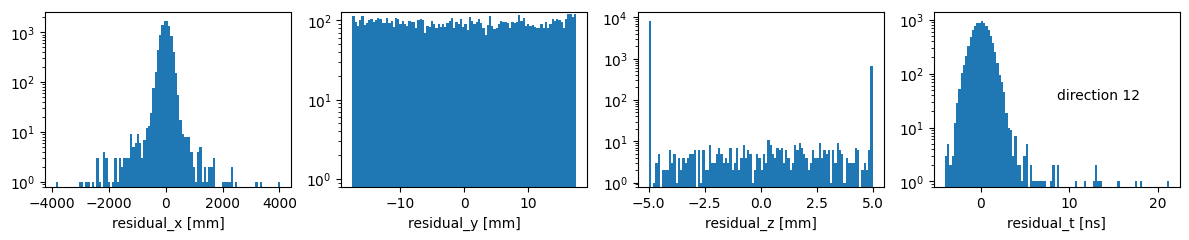

10.291407085620452
249.318339819872
2.8174937930115176
1.2529939444650153


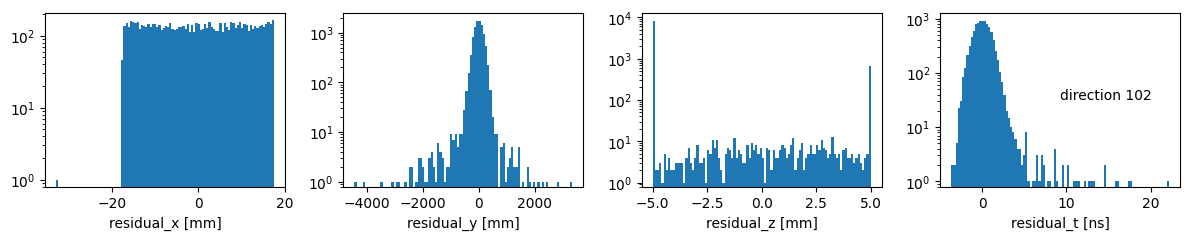

4.621719157012768
299.11790349691944
10.375357785370232
1.2245715731717135


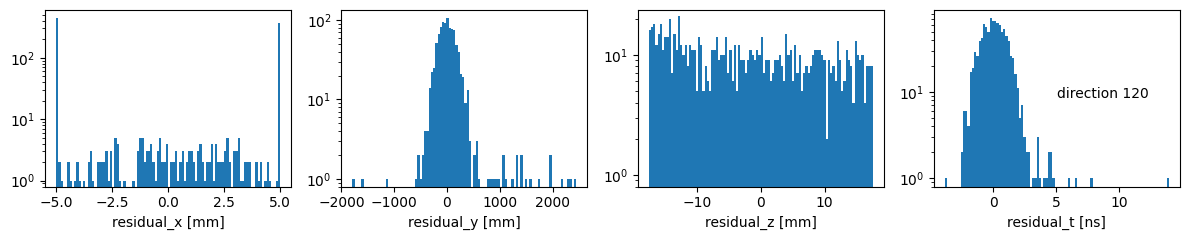

4.753389364635841
10.79885011098858
248.37348121277097
1.1841516187184289


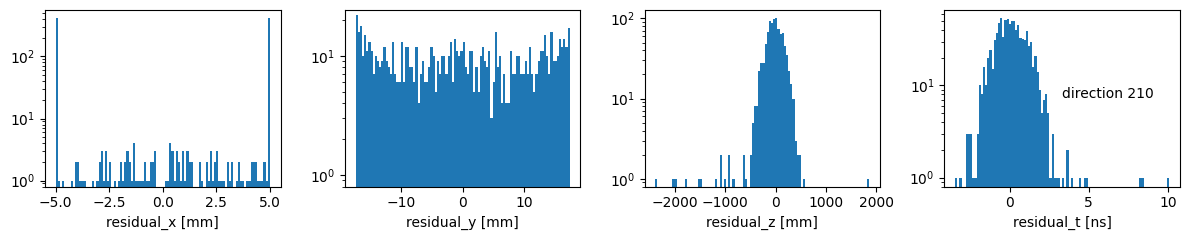

In [21]:
directions = np.unique(res["direction"])
print("All available bar directions: ", directions)

var_all = ['residual_x [mm]','residual_y [mm]','residual_z [mm]','residual_t [ns]']

for i,direction in enumerate(directions):
    mask = (res["direction"] == direction) #& ( res["digi_z"]<10000)
    fig,axes = plt.subplots(1, len(var_all), figsize=(3*len(var_all), 2.5))
    for j, var in enumerate(var_all):
        plt.sca(axes[j])
        plt.hist(res[var[:-5]][mask], bins=100);
        plt.yscale("log")
        plt.ylim(0.8,)
        plt.xlabel(var)
        print(np.std(res[var[:-5]][mask]))
    plt.text(0.5, 0.5, f"direction {direction}",transform = plt.gca().transAxes)
    fig.tight_layout()
    plt.show()

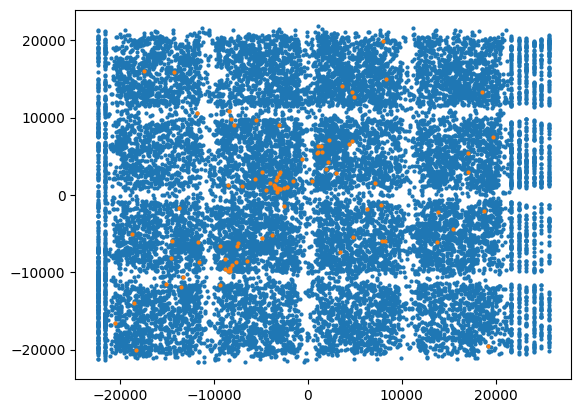

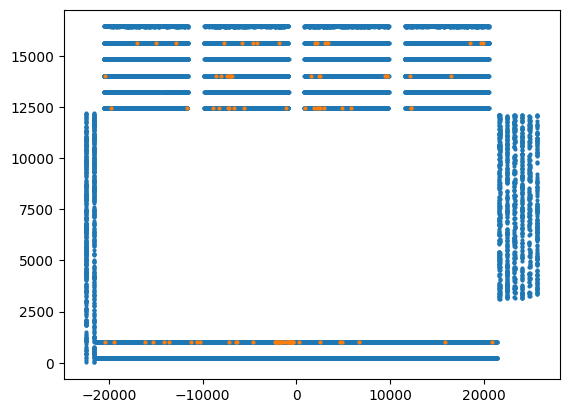

In [14]:
mask_b = (res["direction"] == 12) & (abs(res["residual_x"])>1000)
plt.scatter(res["digi_x"], res["digi_y"], s=4)
plt.scatter(res["digi_x"][mask_b], res["digi_y"][mask_b], s=4)
plt.show()

plt.scatter(res["hit_x"], res["hit_z"], s=4)
plt.scatter(res["hit_x"][mask_b], res["hit_z"][mask_b], s=4)

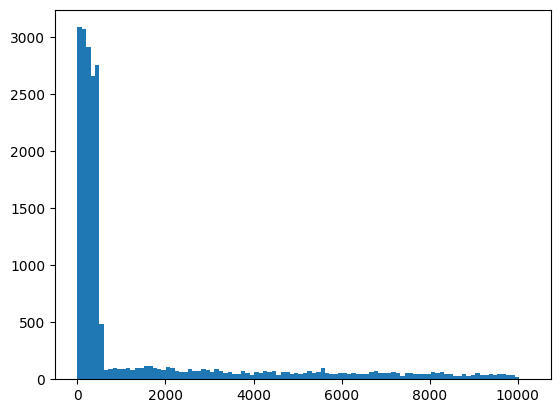

In [15]:
plt.hist(res["det_id"]%10000,bins=102, range=(0,10240));
